**ITCS 5166 Final - Categorizing Cat Vocalizations**

Christina Modica - 801056718

In [1]:
!pip install -U -q tensorflow tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.9 MB/s eta 0:00:00


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
from scipy import signal
from scipy.io import wavfile
from PIL import Image
import numpy as np
import pandas as pd
from pathlib import Path

In [4]:
# mounting google drive folder 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#set path 
dir = Path('/content/drive/MyDrive/CatSounds')

In [46]:
import glob
df = pd.DataFrame({'filename': [f.name for f in dir.rglob('*.wav')]})
df.value_counts

<bound method DataFrame.value_counts of                         filename
0    I_ANI01_MC_FN_SIM01_104.wav
1    I_BAC01_MC_MN_SIM10_102.wav
2    I_BRA01_MC_MN_SIM01_103.wav
3    I_BRA01_MC_MN_SIM01_104.wav
4    I_DAK01_MC_FN_SIM01_101.wav
..                           ...
435  F_IND01_EU_FN_ELI01_104.wav
436  F_IND01_EU_FN_ELI01_103.wav
437  F_IND01_EU_FN_ELI01_102.wav
438  F_IND01_EU_FN_ELI01_101.wav
439  F_REG01_EU_FN_GIO01_201.wav

[440 rows x 1 columns]>

In [47]:
#put in dtaframe 
df['cat_id'] = df.filename.str.slice(2, 7)
df['situation'] = df.filename.str.get(0).map({'B': 'brushing', 'F': 'food', 'I': 'isolation'})
df['sex'] = df.filename.str.slice(11,13).map({'FN': 'female_n', 'MN': 'male_N', 'FI': 'female_I', 'MI': 'male_I'})
df['breed'] = df.filename.str.get(8).map({'M': 'maine_coon', 'E': 'european_shorthair'})
df

,filename,cat_id,situation,sex,breed
0,I_ANI01_MC_FN_SIM01_104.wav,ANI01,isolation,female_n,maine_coon
1,I_BAC01_MC_MN_SIM10_102.wav,BAC01,isolation,male_N,maine_coon
2,I_BRA01_MC_MN_SIM01_103.wav,BRA01,isolation,male_N,maine_coon
3,I_BRA01_MC_MN_SIM01_104.wav,BRA01,isolation,male_N,maine_coon
4,I_DAK01_MC_FN_SIM01_101.wav,DAK01,isolation,female_n,maine_coon
...,...,...,...,...,...
435,F_IND01_EU_FN_ELI01_104.wav,IND01,food,female_n,european_shorthair
436,F_IND01_EU_FN_ELI01_103.wav,IND01,food,female_n,european_shorthair
437,F_IND01_EU_FN_ELI01_102.wav,IND01,food,female_n,european_shorthair
438,F_IND01_EU_FN_ELI01_101.wav,IND01,food,female_n,european_shorthair


In [49]:
data_labels=['isolation', 'brushing', 'food']

In [50]:
df['sex'].value_counts()

female_n    277
male_N       76
female_I     68
male_I       19
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa652b4c9d0>,
 [Text(1.0192471418341071, 0.41368498143273646, ''),
  Text(0.48534319708405754, 0.9871382785832113, ''),
  Text(-0.18757443772742155, 1.0838892149621389, ''),
  Text(-0.737987148936694, 0.8157051967495917, ''),
  Text(-1.027873772548301, 0.39175950238293394, ''),
  Text(-1.0997476611867991, -0.023560172201530373, ''),
  Text(-1.0132360063080075, -0.42819714562453554, ''),
  Text(-0.7942985418188299, -0.7609795177693556, ''),
  Text(-0.5063746758280122, -0.9765166090139358, ''),
  Text(-0.20303262363464675, -1.0811002514753347, ''),
  Text(0.10195525860618528, -1.0952648653373969, ''),
  Text(0.36224778914593814, -1.038641679916072, ''),
  Text(0.5680372494949923, -0.941983908135465, ''),
  Text(0.7437924234111885, -0.8104152212761749, ''),
  Text(0.8899187180267095, -0.6465637441936395, ''),
  Text(0.9871382899434885, -0.48534317397841864, ''),
  Text(1.0386417095926435, -0.3622477040568662, ''),
  Text(1.0658310426686162, -0.27203710865

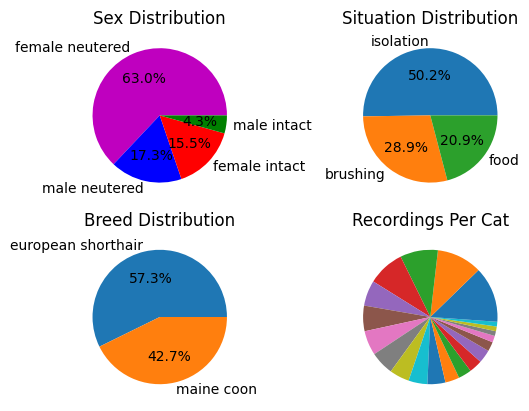

In [51]:
fig, axs = plt.subplots(2, 2)
axs[0,0].set_title('Sex Distribution')
axs[0,0].pie(df['sex'].value_counts(), colors = 'mbrg', labels=['female neutered', 'male neutered', 'female intact', 'male intact'], autopct='%1.1f%%')
axs[1,0].set_title('Breed Distribution')
axs[1, 0].pie(df['breed'].value_counts(), labels=['european shorthair', 'maine coon'], autopct='%1.1f%%')
axs[0,1].set_title('Situation Distribution')
axs[0, 1].pie(df['situation'].value_counts(), labels=['isolation', 'brushing', 'food'], autopct='%1.1f%%')
axs[1,1].set_title('Recordings Per Cat')
axs[1, 1].pie(df['cat_id'].value_counts())

<Axes: title={'center': 'Recordings per Cat'}>

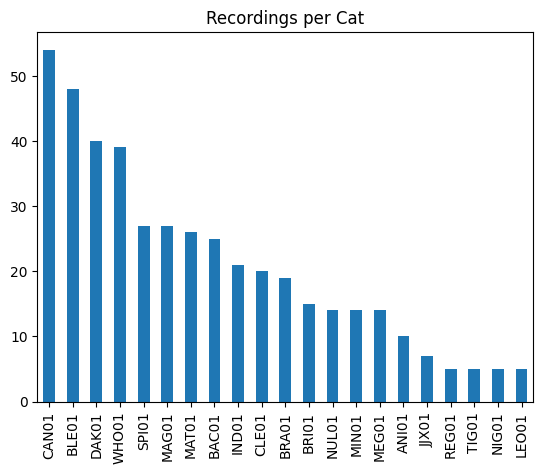

In [52]:
df['cat_id'].value_counts().plot.bar(title = 'Recordings per Cat')

In [53]:
labels = ['brushing', 'isolation', 'food']

In [54]:
#seperate data
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

data_dir='/content/drive/MyDrive/CatSounds'
train_ds, test_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=pathlib.Path(data_dir),
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset='both')
print(train_ds.element_spec)
def squeeze(audio, labels):
  audio = tf.squeeze(audio, axis=-1)
  return audio, labels

train_ds = train_ds.map(squeeze, tf.data.AUTOTUNE)
test_ds = test_ds.map(squeeze, tf.data.AUTOTUNE)

print("Train data shape: {}".format(train_ds))
print("Train target shape: {}".format(test_ds))


for example_audio, example_labels in train_ds.take(1):  
  print(example_audio.shape)
  print(example_labels.shape)

Found 440 files belonging to 3 classes.
Using 352 files for training.
Using 88 files for validation.
(TensorSpec(shape=(None, 16000, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Train data shape: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 16000), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Train target shape: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 16000), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
(64, 16000)
(64,)


In [55]:
import tensorflow as tf

def get_spectrogram(waveform):

  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      waveform, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

In [56]:
import os 

for example_audio, example_labels in train_ds.take(1):  
  print(example_audio)
  print(example_labels)

for i in range(3):
  label = example_labels
  waveform = example_audio[i]
  spectrogram = get_spectrogram(waveform)

  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')


tf.Tensor(
[[ 1.9226074e-03  1.3427734e-03  7.3242188e-04 ... -2.4414062e-04
   0.0000000e+00 -4.2724609e-04]
 [ 1.8310547e-04  2.7465820e-04  1.8310547e-04 ... -3.9672852e-04
  -4.2724609e-04 -2.7465820e-04]
 [-2.4414062e-04 -4.2724609e-04  4.8828125e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 8.5449219e-04  5.1879883e-04 -1.8310547e-04 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-3.3569336e-04 -4.2724609e-04 -4.2724609e-04 ... -1.8310547e-04
   3.6621094e-04  9.1552734e-05]], shape=(64, 16000), dtype=float32)
tf.Tensor(
[2 0 1 0 2 0 1 2 0 0 2 0 2 2 0 2 2 2 2 2 1 2 0 1 2 1 2 2 2 0 0 2 1 2 0 0 1
 1 2 1 0 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 1 1 2 0 2 2], shape=(64,), dtype=int32)
Label: tf.Tensor(
[2 0 1 0 2 0 1 2 0 0 2 0 2 2 0 2 2 2 2 2 1 2 0 1 2 1 2 2 2 0 0 2 1 2 0 0 1
 1 2 1 0 2 1 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 1 1 2 0 2 2], shape=(64,), dtype=int32)
Waveform 

In [57]:
#create spectrograms
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    assert len(spectrogram.shape) == 3
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)


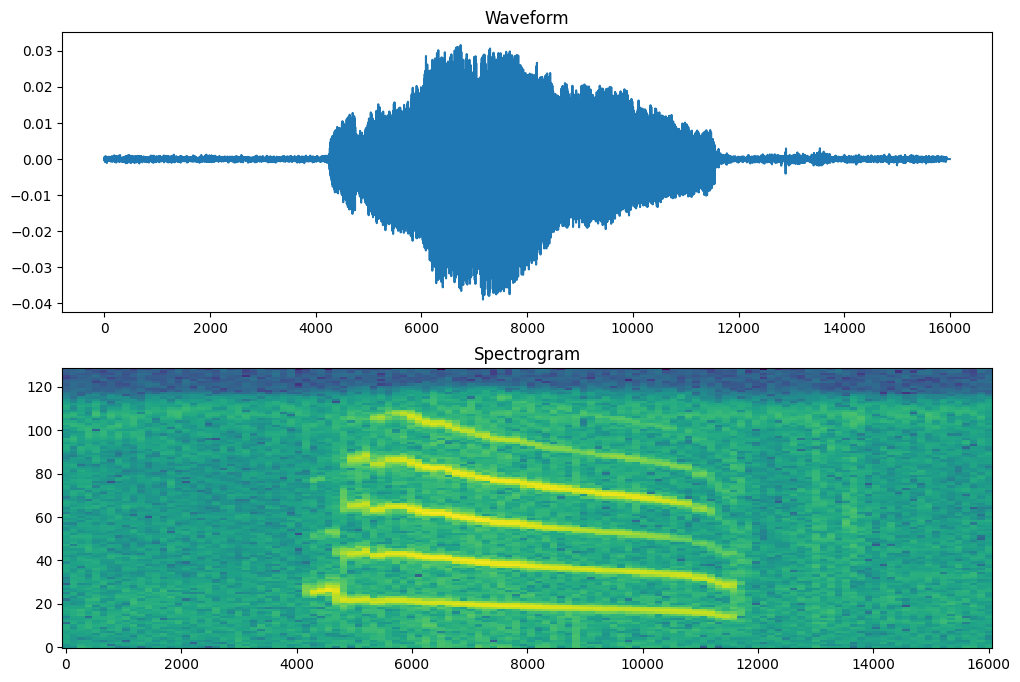

In [58]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform)
axes[0].set_title('Waveform')

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.show()

In [59]:
def make_spec_ds(ds):
    return ds.map(
      map_func=lambda audio,label: (get_spectrogram(audio), label),
      num_parallel_calls=tf.data.AUTOTUNE)

In [60]:
#this tkaes a few minutes to run
train_spectrogram_ds = make_spec_ds(train_ds)
test_spectrogram_ds = make_spec_ds(test_ds) 

train_spectrogram_ds.element_spec

(TensorSpec(shape=(None, 124, 129, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

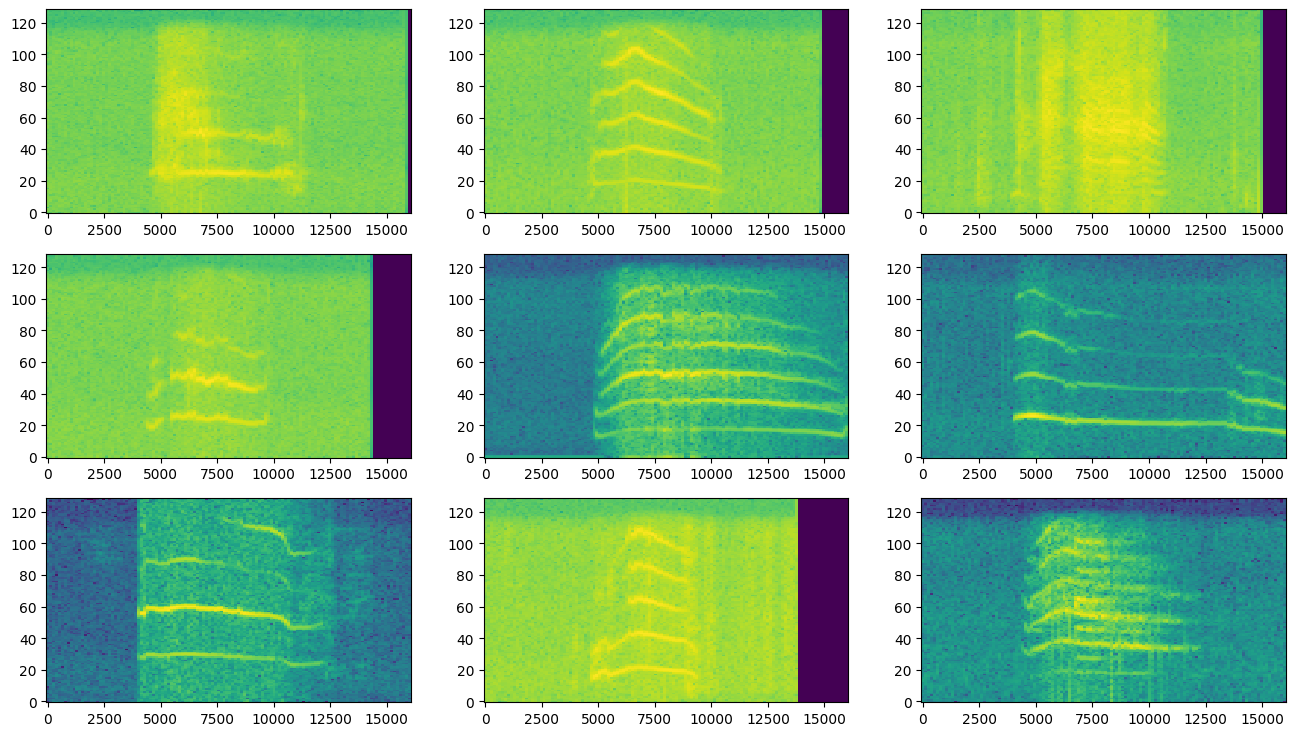

In [61]:
for example_spectrograms, example_spect_labels in train_spectrogram_ds.take(1):
  break

rows = 3
cols = 3
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 9))

for i in range(n):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(example_spectrograms[i].numpy(), ax)

plt.show()

In [62]:
example_spectrograms.shape[1:]

TensorShape([124, 129, 1])

In [63]:
import tensorflow as tf
#import eagerpy as ep
from tensorflow.keras import layers
from tensorflow.keras import models

input_shape = example_spectrograms.shape[1:]
print('Input shape:', input_shape)

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Resizing(32, 32),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 32, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                             

In [64]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [65]:
EPOCHS = 10
history = model.fit(
    train_spectrogram_ds,
    validation_data=test_spectrogram_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10
6/6 [==============================] - 16s 3s/step - loss: 1.1057 - accuracy: 0.4744 - val_loss: 0.9323 - val_accuracy: 0.6136
Epoch 2/10
6/6 [==============================] - 5s 614ms/step - loss: 0.9317 - accuracy: 0.5824 - val_loss: 0.8076 - val_accuracy: 0.6023
Epoch 3/10
6/6 [==============================] - 4s 559ms/step - loss: 0.8573 - accuracy: 0.5966 - val_loss: 0.7788 - val_accuracy: 0.6136
Epoch 4/10
6/6 [==============================] - 3s 313ms/step - loss: 0.8101 - accuracy: 0.6420 - val_loss: 0.8070 - val_accuracy: 0.5795
Epoch 5/10
6/6 [==============================] - 3s 322ms/step - loss: 0.7406 - accuracy: 0.6562 - val_loss: 0.7833 - val_accuracy: 0.6364
Epoch 5: early stopping


In [66]:
model.evaluate(test_spectrogram_ds, return_dict=True)

2/2 [==============================] - 0s 27ms/step - loss: 0.7833 - accuracy: 0.6364


{'loss': 0.7833315134048462, 'accuracy': 0.6363636255264282}

Text(0, 0.5, 'Accuracy [%]')

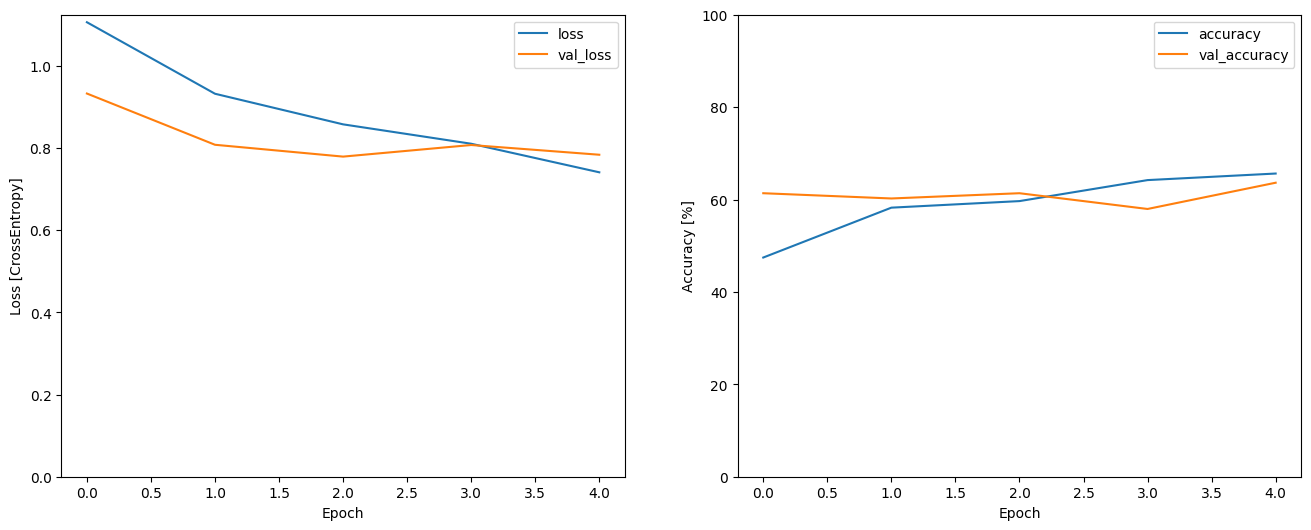

In [67]:
#analyze pt 2
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

In [68]:
y_pred = model.predict(test_spectrogram_ds)
y_pred = tf.argmax(y_pred, axis=1)

2/2 [==============================] - 1s 35ms/step


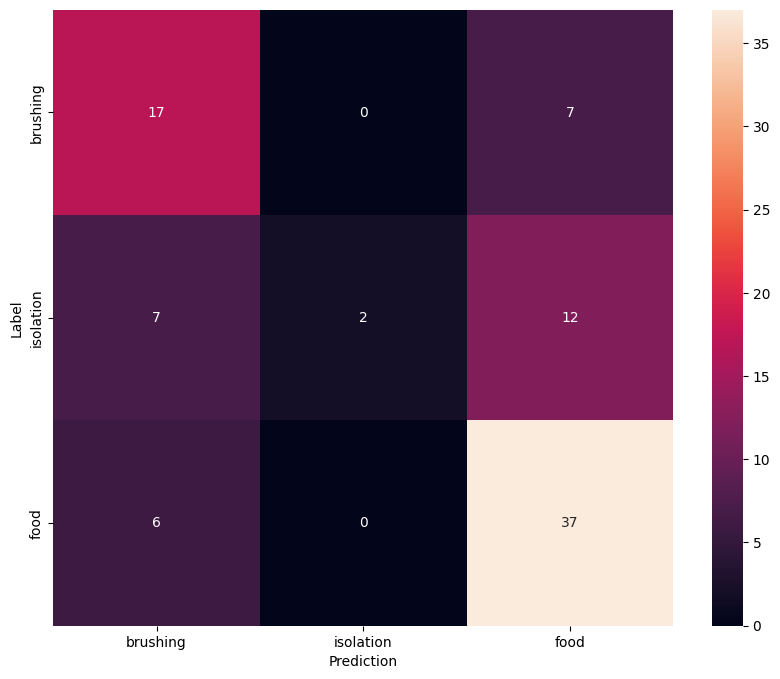

In [69]:
import seaborn as sns

y_true = tf.concat(list(test_spectrogram_ds.map(lambda s,lab: lab)), axis=0)

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=labels,
            yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()
